## The Spark Foundation

### Nikhil Darokar

### Task 1 - Prediction using Supervised ML 

###### Importing The Necessary Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
###### Reading a csv file through link

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv',index_col=False)

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.shape

(25, 2)

In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [142]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Dataset Analysis   

Text(0, 0.5, 'Scores')

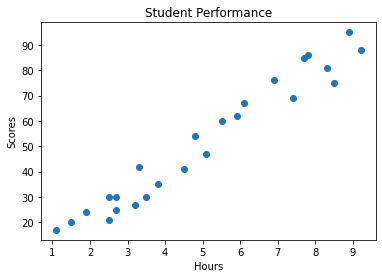

In [143]:
plt.scatter(X,y)
plt.title('Student Performance')
plt.xlabel('Hours')
plt.ylabel('Scores')

###### From above grapgh we can see the data is linearly distributed. It means no. of hours studying a student will increase his marks. We could say a positive coorelation we can see here. Means the data is positively correlated.

###### To check correlation

In [18]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###### Data Preparation For Machine Learning Model

In [61]:
X = df.drop(['Scores'],axis=1)
y = df.drop(['Hours'],axis=1)

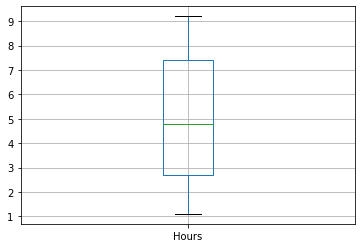

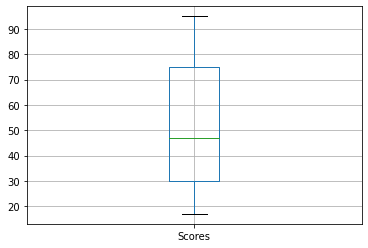

In [160]:
X.plot(kind='box')
plt.grid(axis='both')
y.plot(kind='box')
plt.grid()

###### Model Training and Selection

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
len(X_train)

20

In [69]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
lr.coef_

array([[9.68207815]])

In [71]:
lr.intercept_

array([2.82689235])

In [72]:
m = 9.68207815
c = 2.82689235

###### The equation for our linear regression is :


In [73]:
#y = mx+c
#9.682078158 X+2.82689235

###### Predicting the o/p for test Data and checking it with orginal one

In [78]:
y_pred =  lr.predict(X_test)

In [133]:
y_pred = pd.DataFrame(y_pred)

In [134]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [135]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [136]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['Hours_studied','Actual_Score','Predicted_Score'] )

,Hours_studied,Actual_Score,Predicted_Score
0,8.3,81.0,83.188141
1,2.5,30.0,27.032088
2,2.5,21.0,27.032088
3,6.9,76.0,69.633232
4,5.9,62.0,59.951153


###### Checking model performance

In [137]:
lr.score(X_test,y_test)

0.9678055545167994

#Model is 96.78% accurate for prediction

In [138]:
from sklearn.metrics import mean_absolute_error 

In [139]:
mean_absolute_error(y_test,y_pred)

3.9207511902099244

###### Predicting for more than 9.25 hours how much score student can get

In [140]:
lr.predict([[9.25]])

array([[92.38611528]])

###### Conclusions

In [141]:
print("If student studying for 9.25 hours then he can socre : %d Marks" % int(lr.predict([[9.25]])))

If student studying for 9.25 hours then he can socre : 92 Marks


###### If student studying for 9.25 hours then he can socre : 92 Marks